## Exploratory Data Analisys
Izquierda Diario

### Load tokens
"izquierda diario" tokens

In [1]:
import pandas as pd
import numpy as np

In [2]:
tokens = pd.read_pickle('tokens/topic_tokens_izq_new.pkl')

### Tf IDf Scores

#### TfIDf Transformation

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
tfidf_inf = TfidfTransformer().fit_transform(tokens[tokens.topics == 'inflation'].drop('topics', axis=1))

In [5]:
tfidf_inf_df = pd.DataFrame(tfidf_inf.todense(), columns = tokens[tokens.topics == 'inflation'].drop('topics', axis=1).columns)

In [6]:
tfidf_ex = TfidfTransformer().fit_transform(tokens[tokens.topics == 'exchange'].drop('topics', axis=1))

In [7]:
tfidf_ex_df = pd.DataFrame(tfidf_ex.todense(), columns = tokens[tokens.topics == 'exchange'].drop('topics', axis=1).columns)

### Visual Representation
#### Tf IDf per document
See top rated terms per document and their scores

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
plt.rcParams['figure.figsize'] = [16 , 8]

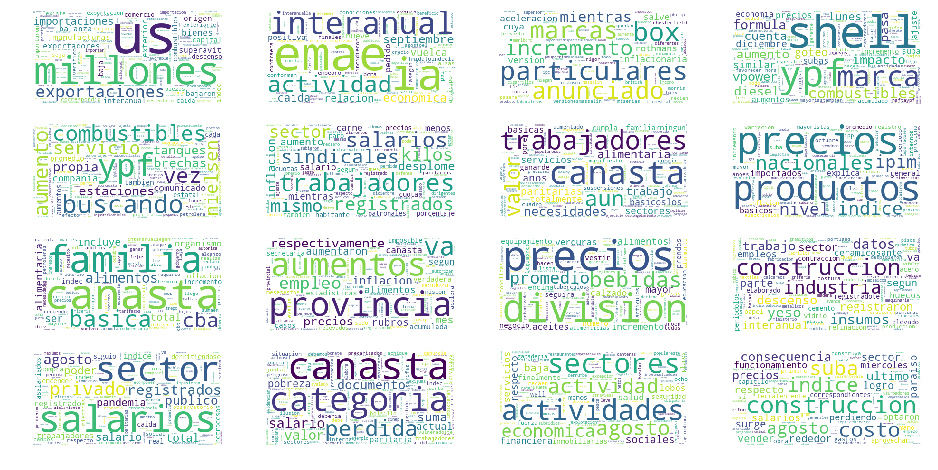

In [10]:
for row in range(tfidf_inf_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_inf_df.iloc[row].sort_values())
    plt.subplot(4, 4, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

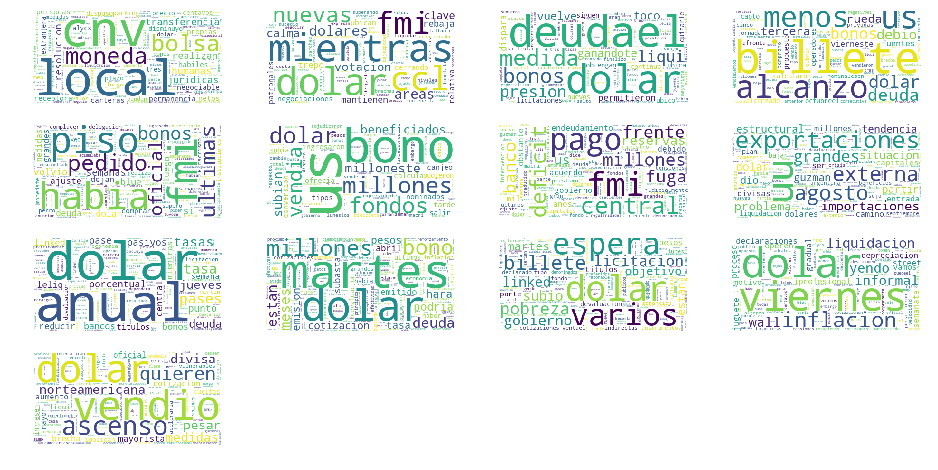

In [11]:
for row in range(tfidf_ex_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_ex_df.iloc[row].sort_values())
    plt.subplot(4, 4, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

#### Tf IDf per topic
See top rated terms amid documents of the same topic

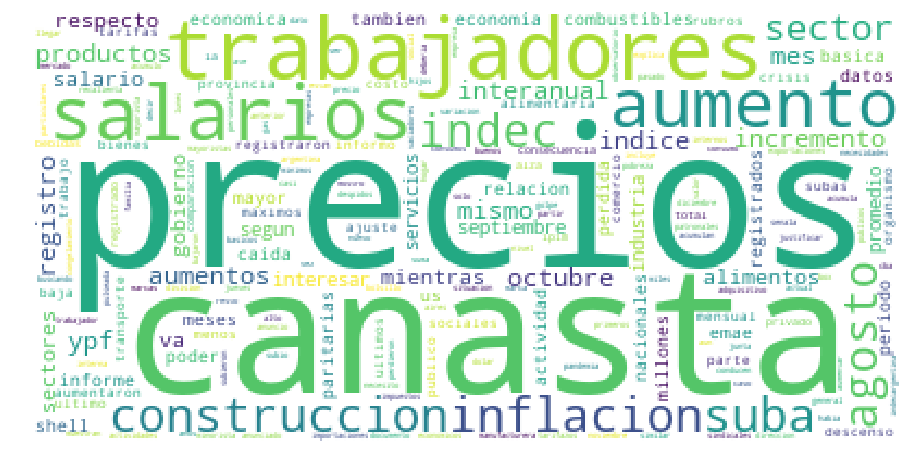

In [12]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_inf_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.axis('off')
plt.show()

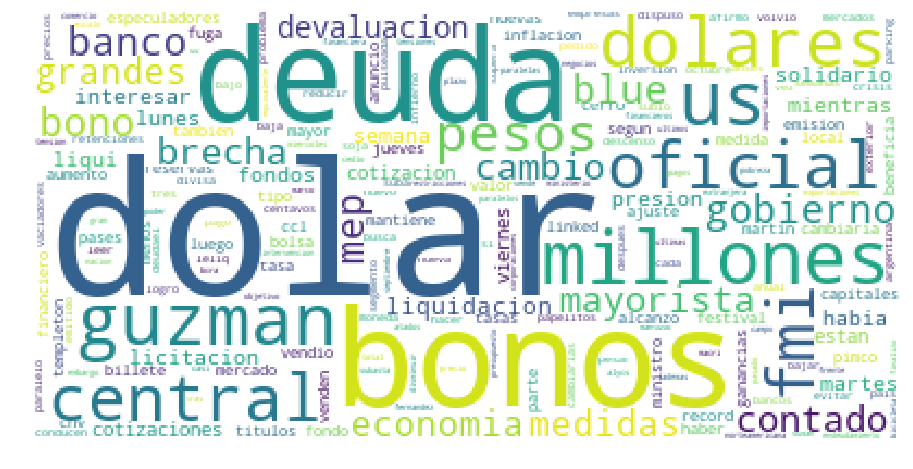

In [13]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_ex_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.axis('off')
plt.show()

## Combinations

In [14]:
tfidf = TfidfTransformer().fit_transform(tokens.drop('topics', axis=1))
tfidf_df = pd.DataFrame(tfidf.todense(), columns = tokens.drop('topics', axis=1).columns)

### PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2).fit(tfidf_df)
pca_tfidf = pca.transform(tfidf_df)

#### Plot

In [17]:
import plotly.graph_objects as go

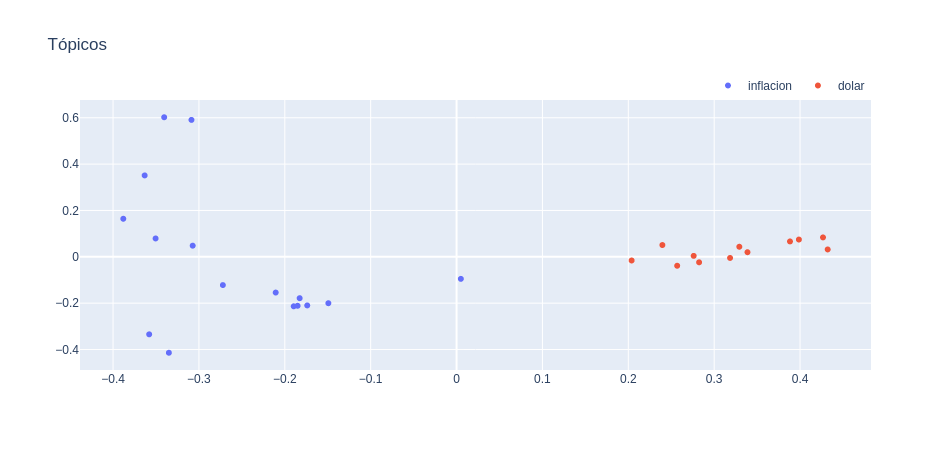

In [18]:
fig = go.Figure()

labels = ['t' + str(i) for i in range(len(tfidf_df[:]))]

fig.add_trace(go.Scatter(
    x = pca_tfidf[:16,0], y = pca_tfidf[:16,1],
    mode ='markers',
    text = labels[:16],
    textposition="middle left",
    name='inflacion'
))
fig.add_trace(go.Scatter(
    x = pca_tfidf[17:,0], y = pca_tfidf[17:,1],
    mode ='markers',
    text = labels[17:],
    textposition="middle left",
    name='dolar'
))

fig.update_layout(title='Tópicos', 
                  xaxis_zeroline=True,
                  legend=dict(
                        orientation="h",
                        yanchor="bottom",
                        y=1,
                        xanchor="right",
                        x=1
                  )
)

fig.show()

### SVD

In [19]:
from sklearn.decomposition import TruncatedSVD

In [20]:
svd = TruncatedSVD(n_components = 2) # n_components = Desired dimensionality of output data. Must be strictly less than the number of features.
p = svd.fit_transform(tfidf_df)
# p = svd.fit_transform(tokens.drop('topics', axis=1))
P = np.around(p,3)

#### Plot

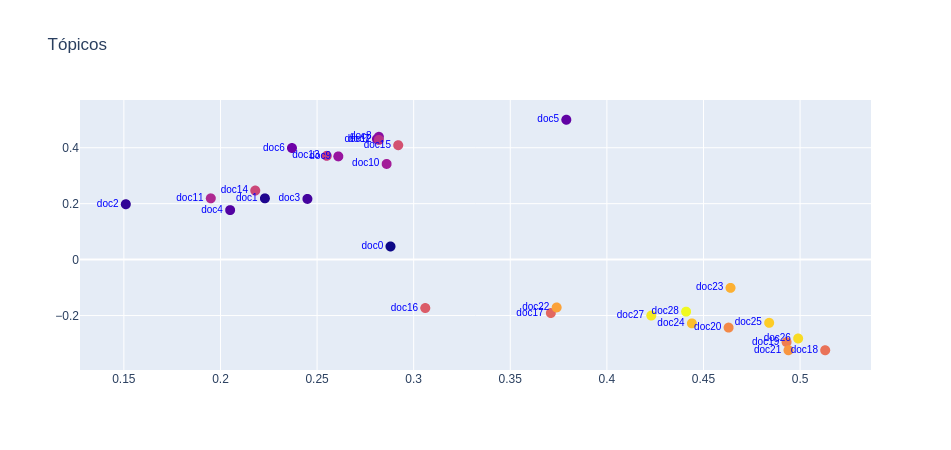

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = P[:,0], y = P[:,1],
    mode ='markers+text',
    text = ['doc' + str(i) for i in range(len(tfidf_df))],
    marker = dict(
        size = 10,
        color = list(range(29)),
    ),
    textposition="middle left",
    textfont=dict(
        size=10,
        color="Blue"
    )
))
fig.update_layout(title='Tópicos', xaxis_zeroline=True)

fig.show()

In [22]:
comp1, comp2 = svd.components_

In [23]:
indices1 = np.argsort(comp1)

In [24]:
indices1 = indices1[::-1]
indices1[:20]

array([ 624,  243,  569, 1212, 1944,  889, 1492,  626, 1328, 1438,  334,
        238,  212,  871,  991,  180, 1795,  429, 1196,  242])

In [25]:
indices2 = np.argsort(comp2)
indices2 = indices2[::-1]

In [26]:
indices2[:20]

array([ 294, 1492, 1720, 1897,  973, 1541, 1795,   57,  980,  991, 1199,
        421, 1229, 1731, 1719,  180,  181, 1659,   98,  971])

In [27]:
dim1 = np.array(tfidf_df.columns)[indices1]
print(f'Dimensión 1:\n{dim1[:50]}')

Dimensión 1:
['dolar' 'bonos' 'deuda' 'millones' 'us' 'guzman' 'precios' 'dolares'
 'oficial' 'pesos' 'central' 'blue' 'banco' 'gobierno' 'inflacion'
 'aumento' 'suba' 'contado' 'mep' 'bono' 'canasta' 'trabajadores'
 'salarios' 'economia' 'mayorista' 'brecha' 'cambio' 'interesar'
 'mientras' 'fmi' 'indec' 'agosto' 'octubre' 'sector' 'grandes' 'medidas'
 'licitacion' 'mes' 'devaluacion' 'segun' 'productos' 'liquidacion'
 'incremento' 'lunes' 'liqui' 'construccion' 'mismo' 'mayor' 'fondos'
 'presion']


In [28]:
dim2 = np.array(tfidf_df.columns)[indices2]
print(f'Dimensión 2:\n{dim2[:50]}')

Dimensión 2:
['canasta' 'precios' 'salarios' 'trabajadores' 'indec' 'productos' 'suba'
 'agosto' 'indice' 'inflacion' 'mes' 'construccion' 'mismo' 'sector'
 'salario' 'aumento' 'aumentos' 'registro' 'alimentos' 'incremento'
 'registrados' 'respecto' 'basica' 'paritarias' 'va' 'servicios' 'octubre'
 'nacionales' 'promedio' 'sectores' 'periodo' 'perdida' 'interanual'
 'maximos' 'alimentaria' 'registrado' 'meses' 'septiembre' 'tarifas'
 'ipim' 'variacion' 'relacion' 'informe' 'aumentaron' 'provincia' 'ultimo'
 'bebidas' 'alza' 'consecuencia' 'economica']
